# ------------------------------- Predication Of Bike Rental Count ------------------------------

#### Problem statement -
The objective of this Case is to Predication of bike rental count on daily based on the
environmental and seasonal settings.
The details of data attributes in the dataset are as follows -
1. instant: Record index
2. dteday: Date
3. season: Season (1:springer, 2:summer, 3:fall, 4:winter)
4. yr: Year (0: 2011, 1:2012)
5. mnth: Month (1 to 12)
6. hr: Hour (0 to 23)
7. holiday: weather day is holiday or not (extracted fromHoliday Schedule)
8. weekday: Day of the week
9. workingday: If day is neither weekend nor holiday is 1, otherwise is 0.
10. weathersit: (extracted fromFreemeteo)
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered
clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
11. temp: Normalized temperature in Celsius. The values are derived via
(t-t_min)/(t_max-t_min),
t_min=-8, t_max=+39 (only in hourly scale)
12. atemp: Normalized feeling temperature in Celsius. The values are derived via
(t-t_min)/(t_maxt_min), t_min=-16, t_max=+50 (only in hourly scale)
13. hum: Normalized humidity. The values are divided to 100 (max)
14. windspeed: Normalized wind speed. The values are divided to 67 (max)
15. casual: count of casual users
16. registered: count of registered users
17. cnt: count of total rental bikes including both casual and registered


In [98]:
#importing library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [99]:
#Reading data file
df = pd.read_csv("day.csv")
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [100]:
df =df.drop(columns=["casual","registered"])
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [101]:
# changing datatype of variables
df['season']= df['season'].astype('object')
df['mnth']=df['mnth'].astype('object')
df['weekday']=df['weekday'].astype('object')
df['weathersit']=df['weathersit'].astype('object')
df['workingday']=df['workingday'].astype('object')
df['yr']=df['yr'].astype('object')
df['holiday']=df['holiday'].astype('object')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null object
yr            731 non-null object
mnth          731 non-null object
holiday       731 non-null object
weekday       731 non-null object
workingday    731 non-null object
weathersit    731 non-null object
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
cnt           731 non-null int64
dtypes: float64(4), int64(2), object(8)
memory usage: 80.1+ KB


### Finding and Removing Missing Values

In [103]:
miss = pd.DataFrame(df.isnull().sum())
miss = miss.rename(columns={0:"miss_count"})
miss["miss_%"] = (miss.miss_count/len(df.instant))*100
miss

,miss_count,miss_%
instant,0,0.0
dteday,0,0.0
season,0,0.0
yr,0,0.0
mnth,0,0.0
holiday,0,0.0
weekday,0,0.0
workingday,0,0.0
weathersit,0,0.0
temp,0,0.0


* The data doesn't seems to have any missing Values.

### Detecting and removing outlier Removing Outliers

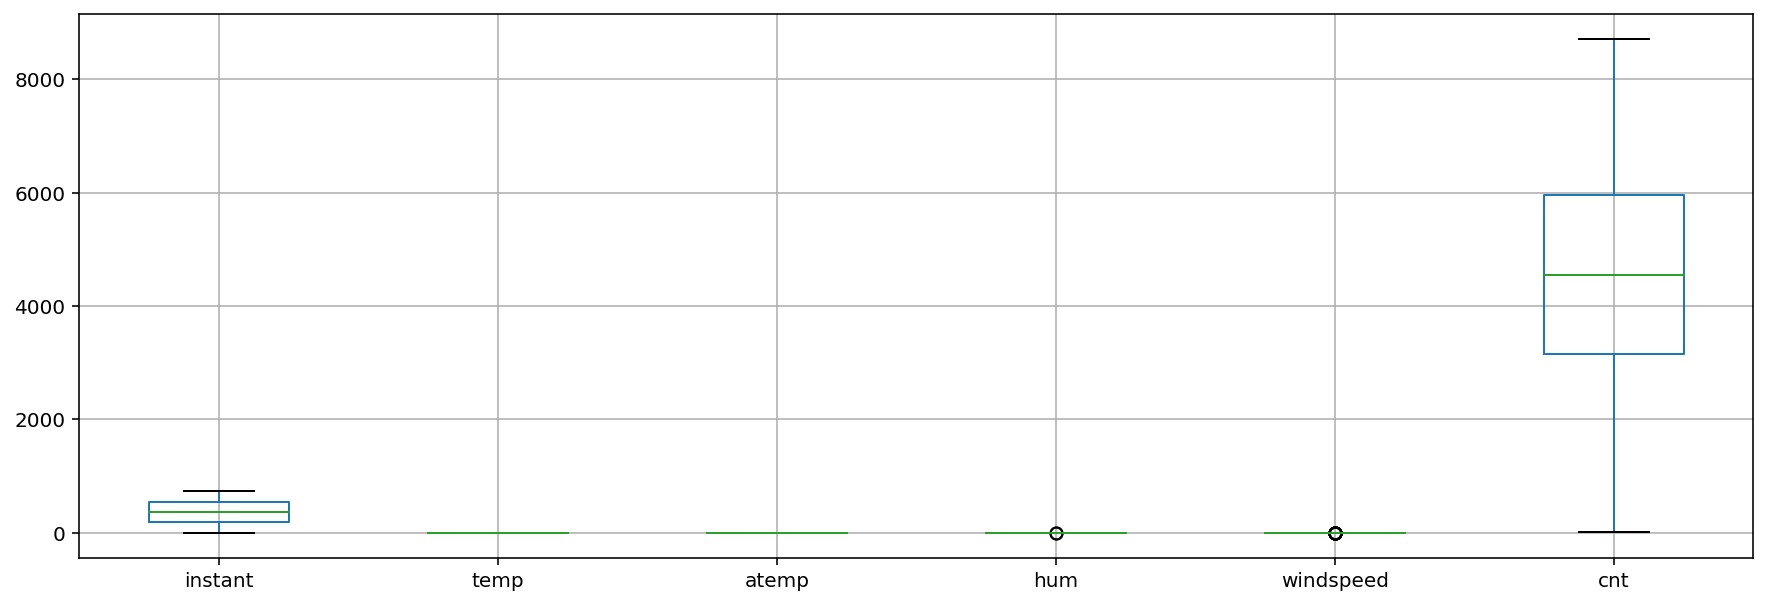

In [104]:
# using box plot
df.boxplot(figsize=(15,5))

In [105]:
df1 = df.copy()
cnames=list(df1.columns)
for i in cnames:
    if isinstance(df1[i].iloc[1] , float) or isinstance(df1[i].iloc[1] , int) or isinstance(df1[i].iloc[1] , np.int64) :
        print(i)
        q75, q25 = np.percentile(df1.loc[:,i], [75 ,25])
        iqr = q75 - q25

        min = q25 - (iqr*1.5)
        max = q75 + (iqr*1.5)
        print("min: "+str(min))
        print("max: "+str(max))
    
        df1 = df1.drop(df1[df1.loc[:,i] < min].index)    
        df1 = df1.drop(df1[df1.loc[:,i] > max].index)
        #df1[df1.loc[:,i] < min] = np.nan
        #df1[df1.loc[:,i] > max] = np.nan
        print("length: "+str(len(df1.instant)))
    elif isinstance(df1[i].iloc[1] , str):
        continue
df1.reset_index(drop=True,inplace=True)       
df1.shape
# creating the list of our purchase type
#label = list(data3.PURCHASE_TYPE )

instant
min: -364.0
max: 1096.0
length: 731
season
min: 0.5
max: 4.5
length: 731
yr
min: -1.5
max: 2.5
length: 731
mnth
min: -5.0
max: 19.0
length: 731
holiday
min: 0.0
max: 0.0
length: 710
weekday
min: -5.0
max: 11.0
length: 710
workingday
min: -1.5
max: 2.5
length: 710
weathersit
min: -0.5
max: 3.5
length: 710
temp
min: -0.12802012499999998
max: 1.1244788749999999
length: 710
atemp
min: -0.06603762500000004
max: 1.012377375
length: 710
hum
min: 0.20296900000000023
max: 1.0467189999999997
length: 708
windspeed
min: -0.013955624999999972
max: 0.381501375
length: 696
cnt
min: -883.875
max: 10133.125
length: 696


(696, 14)

In [106]:
df1.cnt

0       985
1       801
2      1349
3      1562
4      1600
       ... 
691    2114
692    3095
693    1341
694    1796
695    2729
Name: cnt, Length: 696, dtype: int64

In [107]:
# saving the target variable
count = df1.cnt
df1 = df1.iloc[:,2:13]

In [108]:
df1

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...,...
691,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133
692,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471
693,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383
694,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754


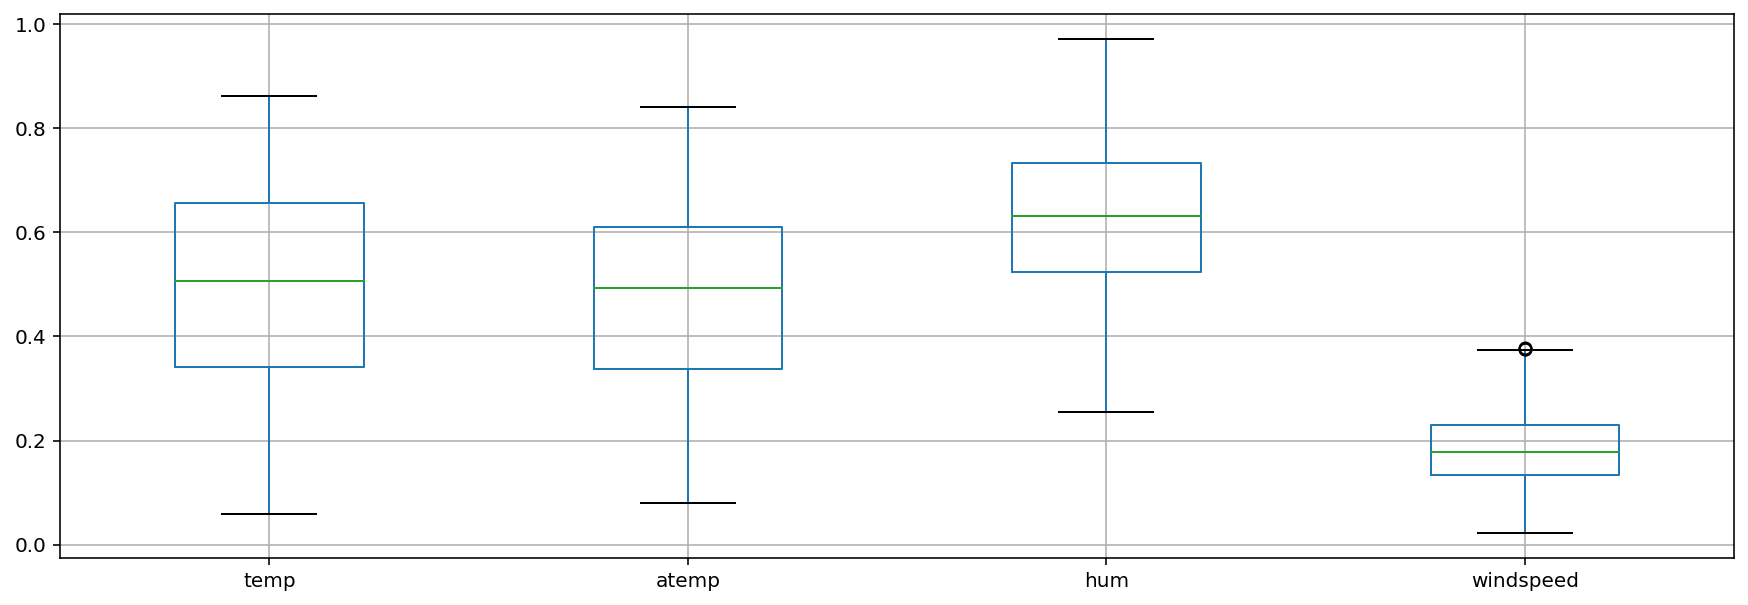

In [109]:
# using box plot
df1.boxplot(figsize=(15,5))

* Only 655 data points left After Removal of all possible outliers.

### Checking the Distribution of data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B88947390>,
      dtype=object)

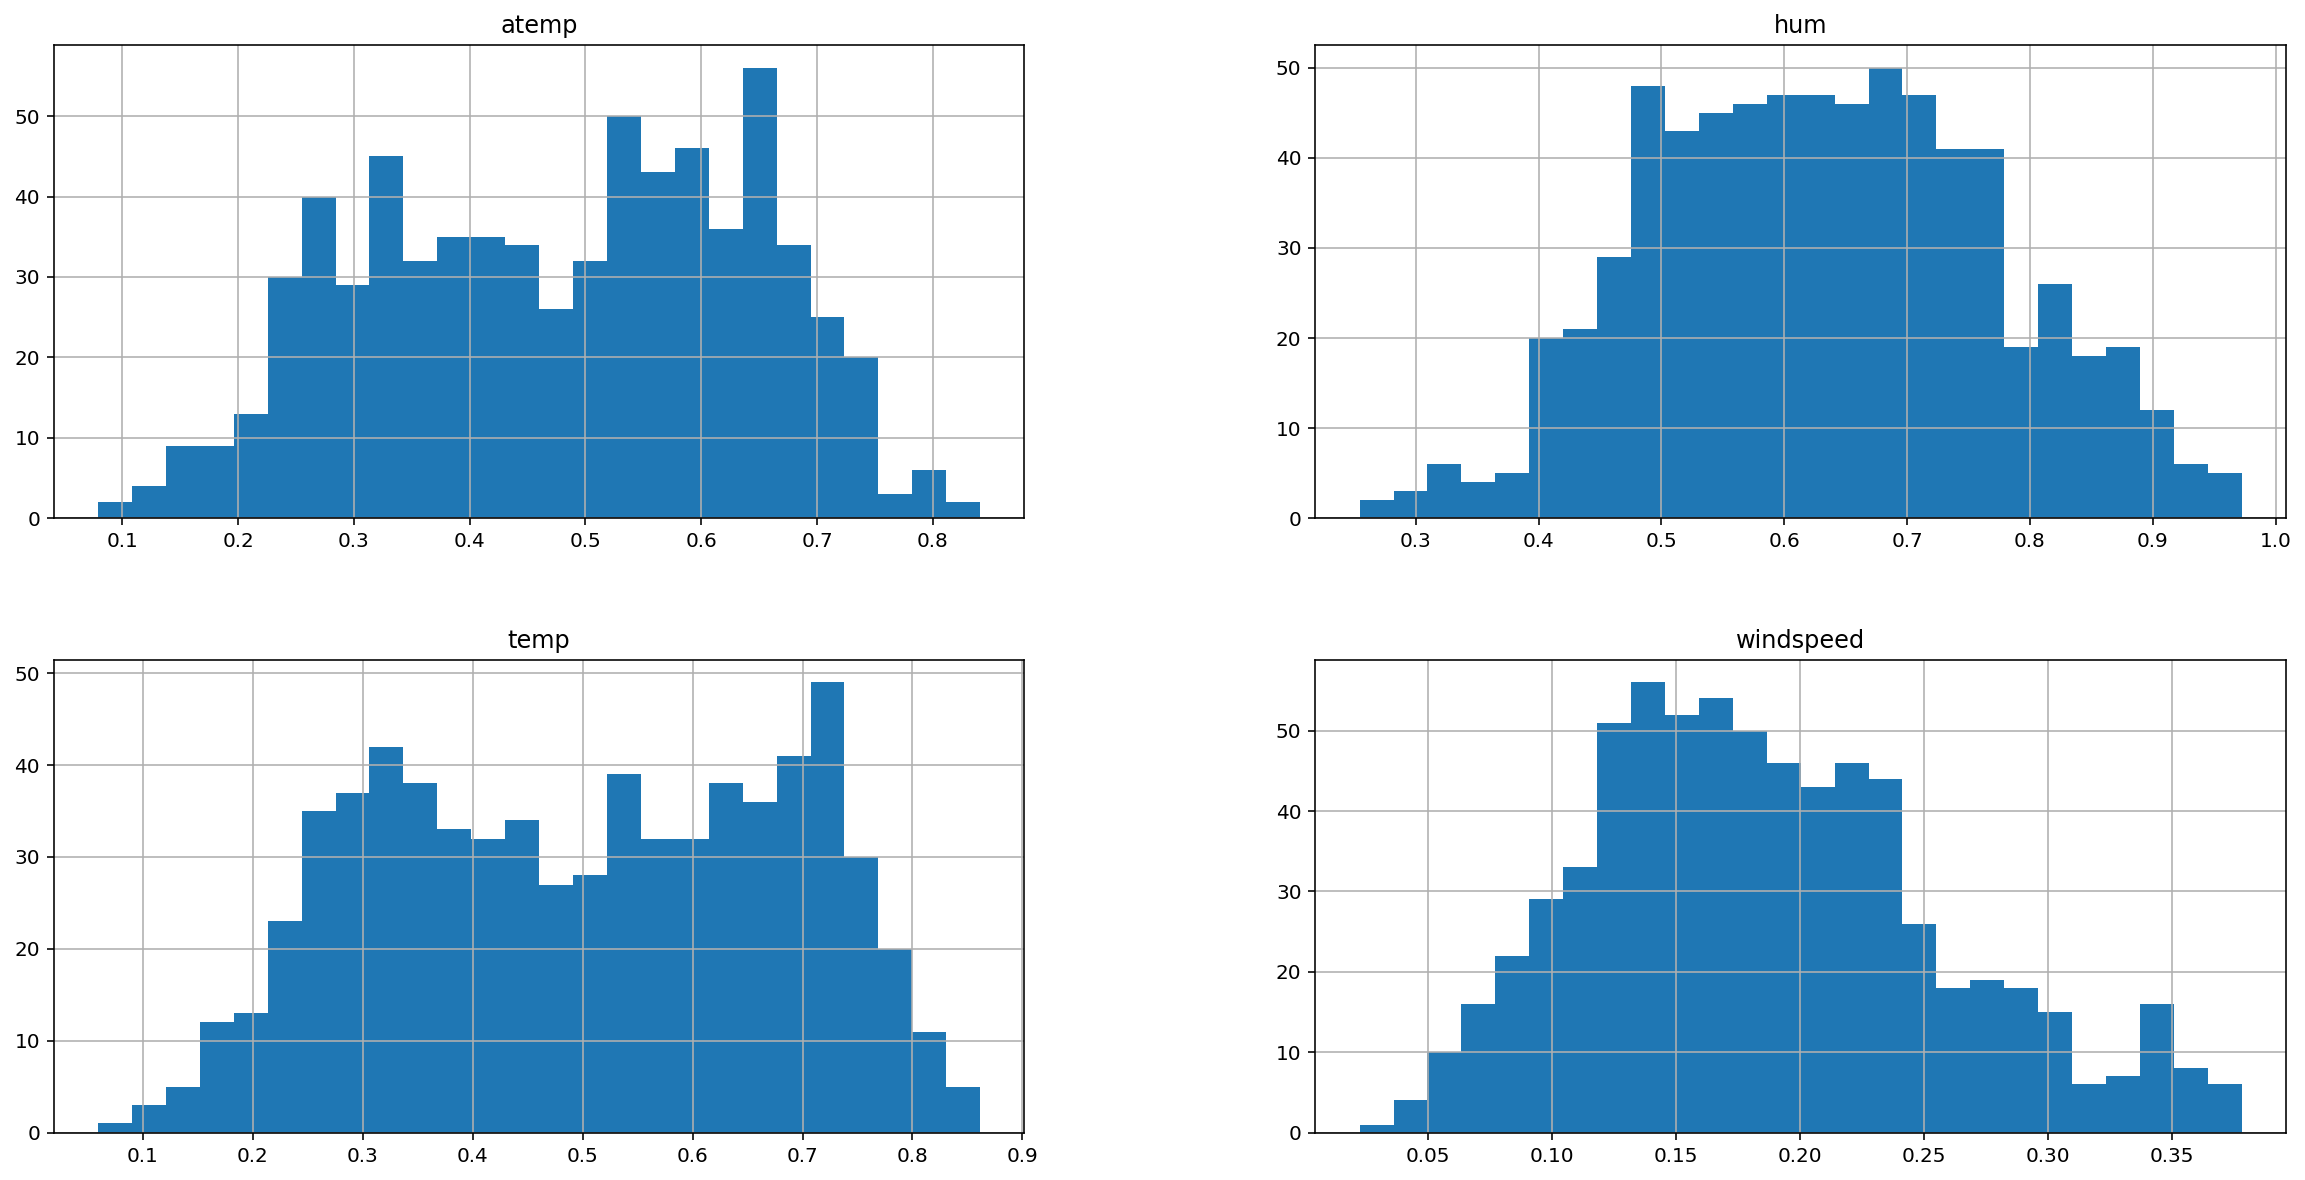

In [110]:
#calculating no. of bins
aa=round(np.sqrt(len(df1.yr)))
#Creating a histogram
df1.hist(figsize=(20,10),bins=int(aa))

## Model1
### Linear Regression
#### Assumption
1. There must be a linear relationship between the dependent variable and the independent variables.  Scatterplots can show whether there is a linear or curvilinear relationship.
2. Multivariate Normality–Multiple regression assumes that the residuals are normally distributed.
3. No Multicollinearity—Multiple regression assumes that the independent variables are not highly correlated with each other.  This assumption is tested using Variance Inflation Factor (VIF) values.
4. Homoscedasticity–This assumption states that the variance of error terms are similar across the values of the independent variables.  A plot of standardized residuals versus predicted values can show whether points are equally distributed across all values of the independent variables.

In [111]:
df2 =df1.copy()
# changing datatype of variables
df2['season']= df2['season'].astype('int64')
df2['mnth']=df2['mnth'].astype('int64')
df2['weekday']=df2['weekday'].astype('int64')
df2['weathersit']=df2['weathersit'].astype('int64')
df2['workingday']=df2['workingday'].astype('int64')
df2['yr']=df2['yr'].astype('int64')
df2['holiday']=df2['holiday'].astype('int64')
df2["count"] = count
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 12 columns):
season        696 non-null int64
yr            696 non-null int64
mnth          696 non-null int64
holiday       696 non-null int64
weekday       696 non-null int64
workingday    696 non-null int64
weathersit    696 non-null int64
temp          696 non-null float64
atemp         696 non-null float64
hum           696 non-null float64
windspeed     696 non-null float64
count         696 non-null int64
dtypes: float64(4), int64(8)
memory usage: 65.4 KB


In [112]:
df2.iloc[:,0:11]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...,...
691,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133
692,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471
693,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383
694,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754


### 1. Identifying whether there is a linear relationship or not between the Target and the dependent variables.

In [113]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
train, test = train_test_split(df2, test_size=0.2)
model1 = sm.OLS(train.iloc[:,11], train.iloc[:,0:11]).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  count   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              1694.
Date:                Tue, 17 Mar 2020   Prob (F-statistic):                        0.00
Time:                        23:56:12   Log-Likelihood:                         -4563.9
No. Observations:                 556   AIC:                                      9148.
Df Residuals:                     546   BIC:                                      9191.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       557.7120     66.494      8.387      0.000     427.097     688.327
yr          2219.5686     75.258     29.493      0.000    2071.737    2367.400
mnth         -35.4822     20.891     -1.698      0.090     -76.519       5.555
holiday     1.597e-12   3.99e-13      4.006      0.000    8.14e-13    2.38e-12
weekday      118.3828     18.299      6.469      0.000      82.437     154.328
workingday   153.3232     82.182      1.866      0.063      -8.108     314.754
weathersit  -695.7573     95.876     -7.257      0.000    -884.089    -507.425
temp        1015.1217   1488.082      0.682      0.495   -1907.945    3938.188
atemp       4955.3734   1670.313      2.967      0.003    1674.348    8236.399
hum           52.7458    328.637      0.160      0.873    -592.803     698.294
windspeed   -767.2516    461.578     -1.662      0.097   -1673.938     139.435
==============================================================================
Omnibus:                       87.092   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.462
Skew:                          -0.843   Prob(JB):                     5.93e-43
Kurtosis:                       5.356   Cond. No.                     7.48e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.3e-36. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [114]:
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
testp = model1.predict(test.iloc[:,0:11])

In [115]:
MAPE(test.iloc[:,11],testp)

18.78733940426562

In [116]:
r2_score(test.iloc[:,11],testp),math.sqrt(mean_squared_error(test.iloc[:,11],testp))

(0.7659633574226068, 877.0640414849721)

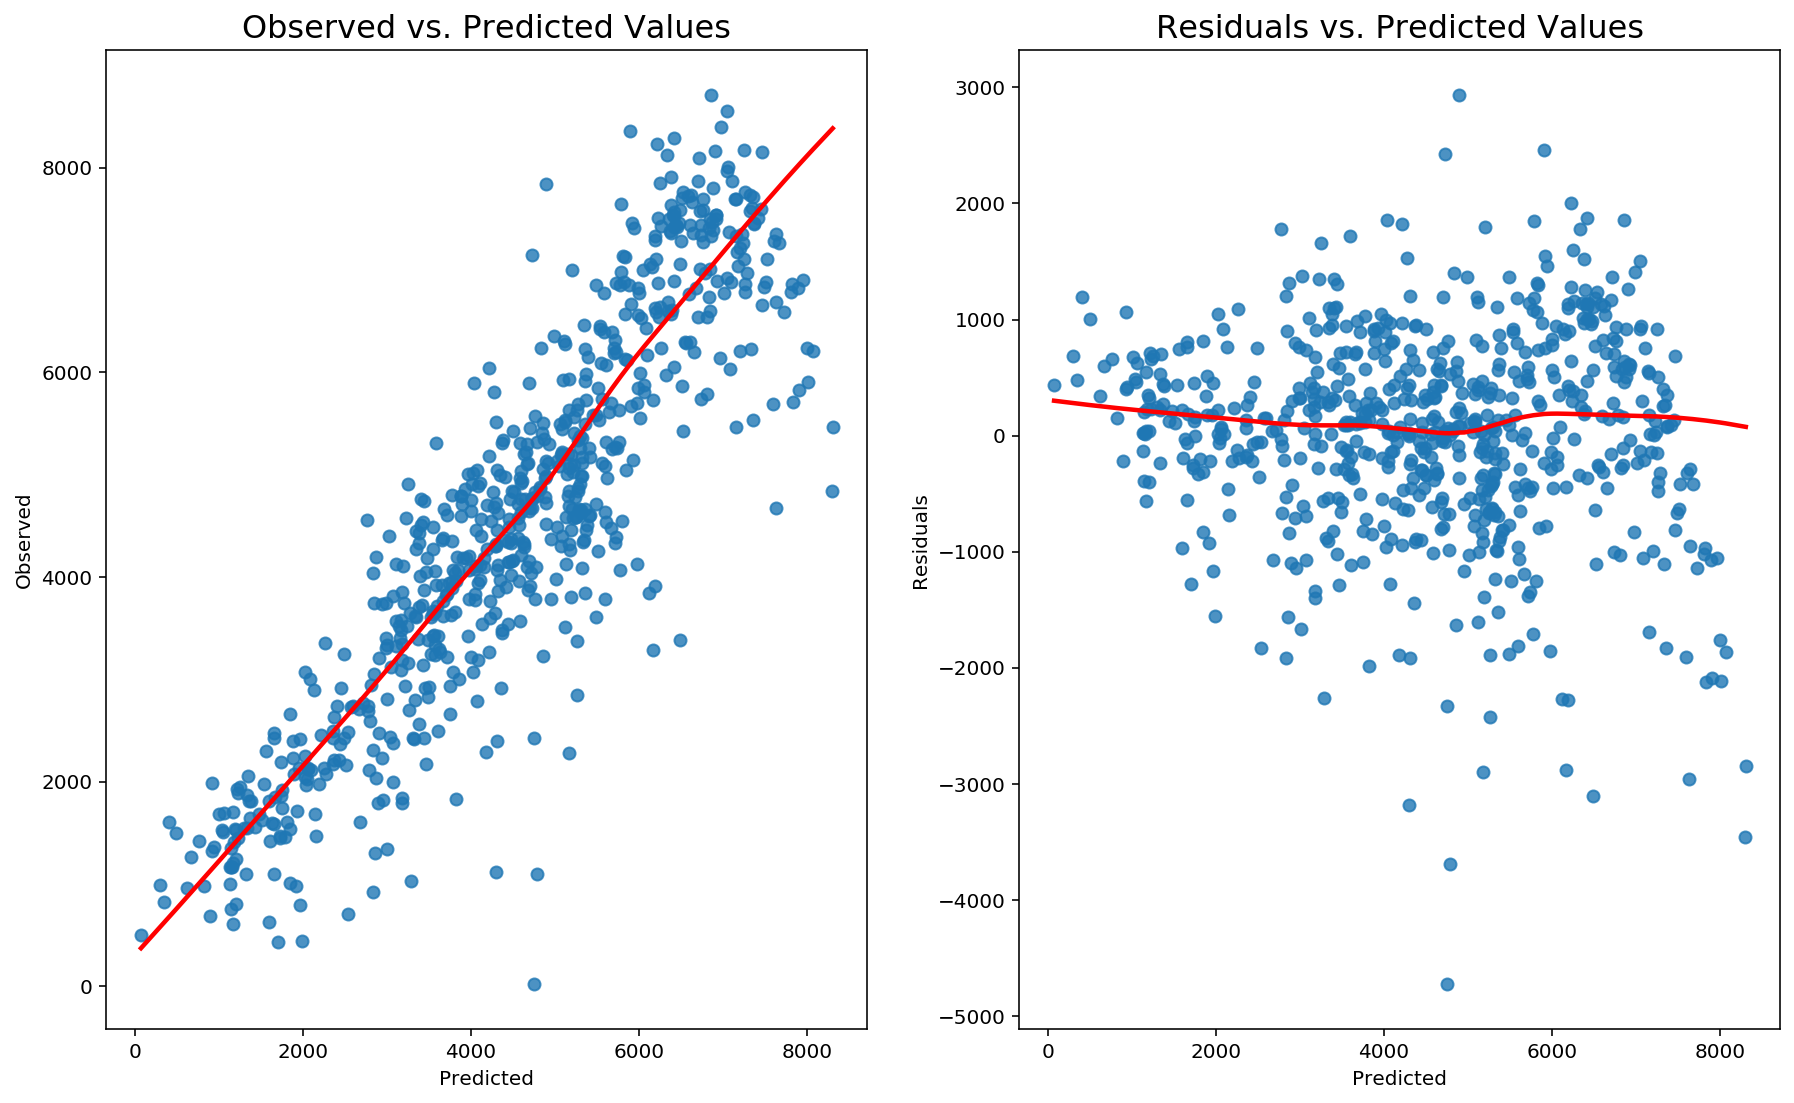

In [117]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
#sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model1 = sm.OLS(df2.iloc[:,11], df2.iloc[:,0:11]).fit()
model1.summary()

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(model1, count) 
#count

##### from the above Graph we can see that there is a linear relationship between variables.
* they’re pretty symmetrically distributed, tending to cluster towards the middle of the plot

### 2. Identifying Multivariate Normality. 
* plotting Residuals with theoritical quantiles.

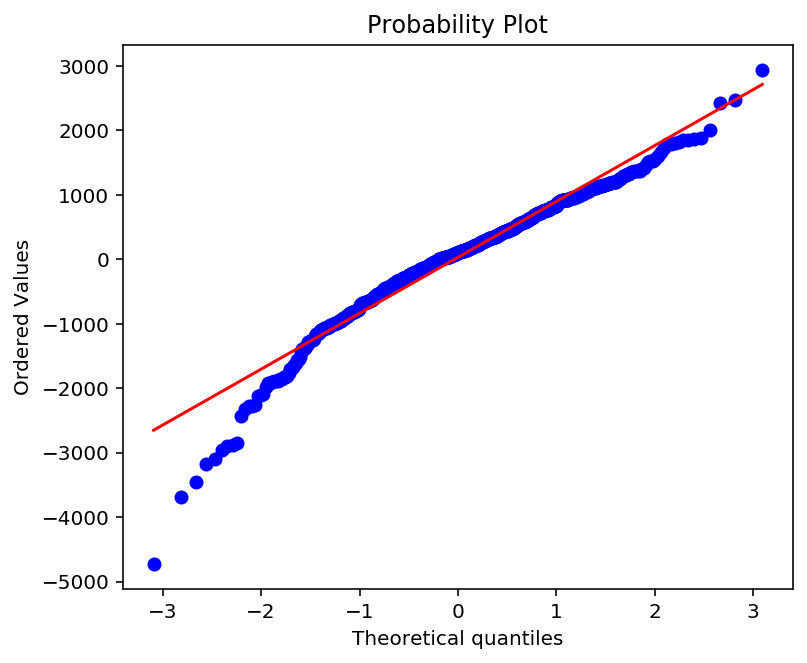

In [118]:
import scipy as sp
resids = model1.resid
fig, ax = plt.subplots(figsize=(6,5))
a = sp.stats.probplot(resids, plot=ax)

* The good fit indicates that normality is a reasonable approximation.

### 3. Identifying and Removing Multicolinearity from the data

In [119]:
##Correlation analysis
#Correlation plot
df_corr = df2

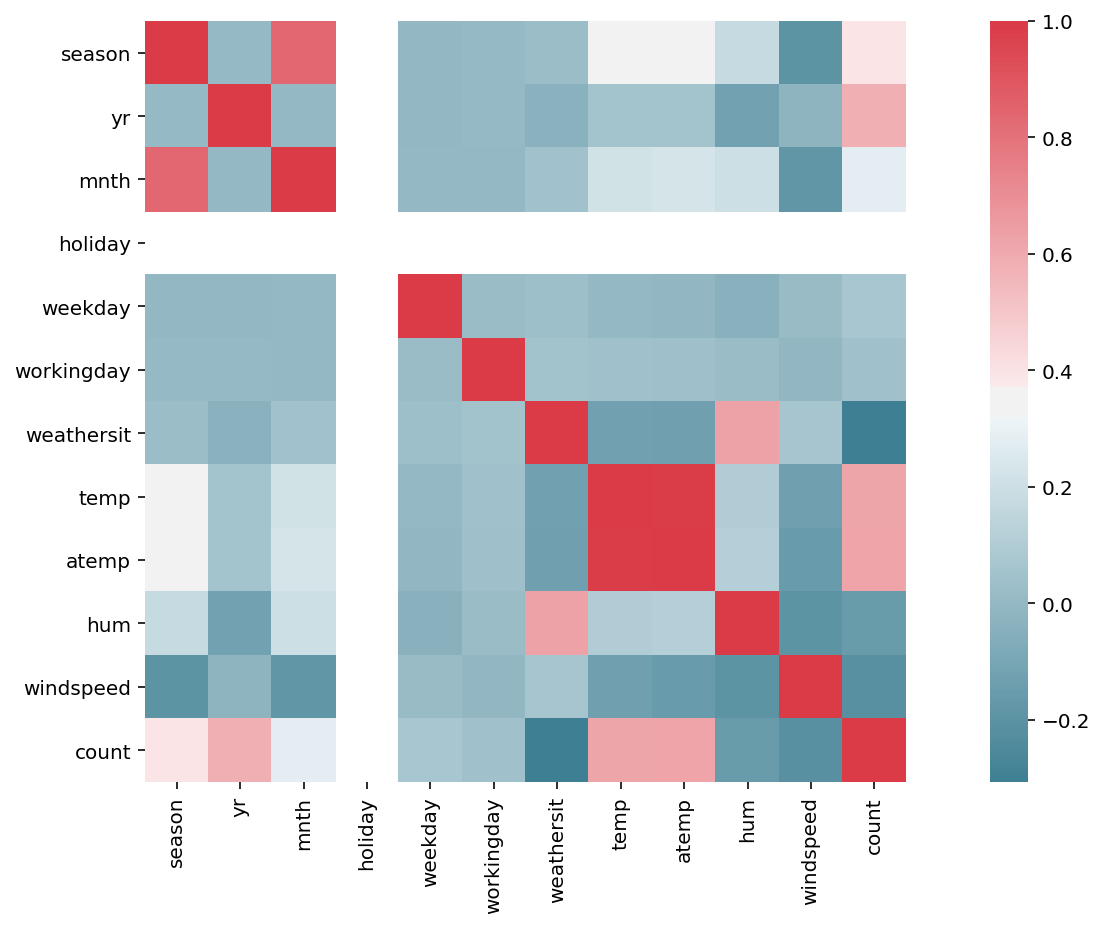

In [120]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(15, 7))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [121]:
# correlation matrix
corr

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
season,1.000000,0.005261,0.840437,NaN,-0.005433,0.007843,0.020594,0.326296,0.333270,0.176159,-0.196127,0.396186
yr,0.005261,1.000000,0.001304,NaN,-0.001388,0.007599,-0.040053,0.056605,0.055656,-0.121518,-0.024964,0.583527
mnth,0.840437,0.001304,1.000000,NaN,0.003533,0.002860,0.045158,0.218620,0.224812,0.200747,-0.182652,0.283133
holiday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,-0.005433,-0.001388,0.003533,NaN,1.000000,0.014905,0.034451,0.001777,-0.006580,-0.042619,0.012292,0.070244
workingday,0.007843,0.007599,0.002860,NaN,0.014905,1.000000,0.051341,0.040068,0.037123,0.018048,-0.006540,0.040050
weathersit,0.020594,-0.040053,0.045158,NaN,0.034451,0.051341,1.000000,-0.126561,-0.128650,0.630695,0.061170,-0.307263
temp,0.326296,0.056605,0.218620,NaN,0.001777,0.040068,-0.126561,1.000000,0.991518,0.103624,-0.130387,0.619427
atemp,0.333270,0.055656,0.224812,NaN,-0.006580,0.037123,-0.128650,0.991518,1.000000,0.115488,-0.156090,0.622290
hum,0.176159,-0.121518,0.200747,NaN,-0.042619,0.018048,0.630695,0.103624,0.115488,1.000000,-0.196551,-0.151820


##### we can clearly see that some independent variables are highly correlated to each other
* lets calculate the vif and remove those variables in order to lessen the complexity of the model.

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
fvif = df2.iloc[:,0:11]
X = add_constant(fvif)

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=fvif.columns).T

C:\Users\MAYANK\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\MAYANK\AppData\Roaming\Python\Python37\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
vif,3.694233,1.028766,3.495677,NaN,1.012839,1.006399,1.909454,61.951493,62.823651,2.035231,1.166658


#### Since atemp has a High VIF score we will remove it from our data set.

In [123]:
cc =['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'count']
reg = df2.loc[:,cc]
reg

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,count
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
691,1,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114
692,1,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095
693,1,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341
694,1,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796


In [124]:
train, test = train_test_split(reg, test_size=0.2)
model2 = sm.OLS(train.iloc[:,10], train.iloc[:,0:10]).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  count   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              1711.
Date:                Tue, 17 Mar 2020   Prob (F-statistic):                        0.00
Time:                        23:56:26   Log-Likelihood:                         -4583.8
No. Observations:                 556   AIC:                                      9186.
Df Residuals:                     547   BIC:                                      9224.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       543.4133     66.152      8.215      0.000     413.470     673.357
yr          2103.6437     77.960     26.984      0.000    1950.507    2256.781
mnth         -33.7111     20.724     -1.627      0.104     -74.419       6.997
holiday     6.734e-13   7.01e-14      9.601      0.000    5.36e-13    8.11e-13
weekday      102.2916     19.148      5.342      0.000      64.679     139.904
workingday   155.5450     85.242      1.825      0.069     -11.897     322.987
weathersit  -641.0884     98.456     -6.511      0.000    -834.487    -447.690
temp        5313.2062    226.142     23.495      0.000    4868.994    5757.418
hum          339.6630    315.355      1.077      0.282    -279.792     959.118
windspeed   -306.2260    484.720     -0.632      0.528   -1258.367     645.915
==============================================================================
Omnibus:                       79.718   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.073
Skew:                          -0.779   Prob(JB):                     3.54e-39
Kurtosis:                       5.283   Cond. No.                     4.22e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.31e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### Since p-value of variables ["hum","windspeed","mnth"] 
* are statistically insignificant for our model
* because there p value is greater than alpha =0.05.
* so we will remove them from our data frame

In [125]:
rm =  ["hum","windspeed","mnth"] 
reg2=reg.drop(columns=rm)
reg2.iloc[:,0:7]

,season,yr,holiday,weekday,workingday,weathersit,temp
0,1,0,0,6,0,2,0.344167
1,1,0,0,0,0,2,0.363478
2,1,0,0,1,1,1,0.196364
3,1,0,0,2,1,1,0.200000
4,1,0,0,3,1,1,0.226957
...,...,...,...,...,...,...,...
691,1,1,0,4,1,2,0.254167
692,1,1,0,5,1,2,0.253333
693,1,1,0,6,0,2,0.253333
694,1,1,0,0,0,1,0.255833


In [126]:
testp = model2.predict(test.iloc[:,0:10])


In [127]:
MAPE(test.iloc[:,10],testp)

20.086695127377098

In [128]:
r2_score(test.iloc[:,10],testp),math.sqrt(mean_squared_error(test.iloc[:,10],testp))

(0.8418730942102366, 792.3193179394322)

### 4. Detecting Hetroscedaticity
* Using goldfeld quandt test

In [129]:
gq_test = pd.DataFrame(sms.het_goldfeldquandt(model2.resid, model2.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])
gq_test

,value
F statistic,1.406966
p-value,0.002630


##### Since p-value is greater than the alpha = 0.05, we can asume that data is homoscedatic.

### Building a final model after satisfying all the assumption.

In [130]:
train, test = train_test_split(reg2, test_size=0.2)
model3 = sm.OLS(train.iloc[:,7], train.iloc[:,0:7]).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  count   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              2803.
Date:                Tue, 17 Mar 2020   Prob (F-statistic):                        0.00
Time:                        23:56:43   Log-Likelihood:                         -4563.8
No. Observations:                 556   AIC:                                      9140.
Df Residuals:                     550   BIC:                                      9166.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       476.7974     35.730     13.344      0.000     406.613     546.982
yr          2226.2199     74.137     30.028      0.000    2080.593    2371.847
holiday    -3.795e-12   1.66e-13    -22.903      0.000   -4.12e-12   -3.47e-12
weekday      103.7959     17.932      5.788      0.000      68.571     139.020
workingday   159.5745     79.833      1.999      0.046       2.760     316.389
weathersit  -640.2287     58.573    -10.930      0.000    -755.283    -525.175
temp        5363.2767    193.690     27.690      0.000    4982.814    5743.739
==============================================================================
Omnibus:                       61.451   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.647
Skew:                          -0.692   Prob(JB):                     2.56e-24
Kurtosis:                       4.666   Cond. No.                     2.51e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.87e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [131]:
testp = model3.predict(test.iloc[:,0:7])

In [132]:
MAPE(test.iloc[:,7],testp),math.sqrt(mean_squared_error(test.iloc[:,7],testp))

(174.43614623146615, 939.264901455412)

#### Applyting K-Fold cross validation with 10 Folds to finalize the model.

In [133]:
from sklearn.model_selection import KFold # import KFold
reg2.reset_index(drop=True,inplace=True)
y = reg2["count"].values
X = reg2.iloc[:,0:7].values
kf = KFold(n_splits=10)
kf.get_n_splits(X)

10

In [134]:
mape = []
rmse = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    models = sm.OLS(y_train, X_train).fit()
    testp = models.predict(X_test)
    mape.append(MAPE(y_test,testp))
    rmse.append(math.sqrt(mean_squared_error(y_test,testp)))


In [135]:
np.mean(mape),np.mean(rmse)

(55.67640944299673, 941.3712932156241)

#### The Final Model satisfy all assumptions of linear regression 


In [136]:
print("1. explains around 99% variance \n2. RMSE of "+str(np.mean(rmse))+" and \n3. MAPE of "+str(np.mean(mape)))

1. explains around 99% variance 
2. RMSE of 941.3712932156241 and 
3. MAPE of 55.67640944299673


## Model2
### Decision Tree Regressor

In [137]:
df3 = reg2.copy()
df3["count"] = count
df3

,season,yr,holiday,weekday,workingday,weathersit,temp,count
0,1,0,0,6,0,2,0.344167,985
1,1,0,0,0,0,2,0.363478,801
2,1,0,0,1,1,1,0.196364,1349
3,1,0,0,2,1,1,0.200000,1562
4,1,0,0,3,1,1,0.226957,1600
...,...,...,...,...,...,...,...,...
691,1,1,0,4,1,2,0.254167,2114
692,1,1,0,5,1,2,0.253333,3095
693,1,1,0,6,0,2,0.253333,1341
694,1,1,0,0,0,1,0.255833,1796


#### Setting up cross validation with 5 fold approx 20% data

In [138]:
from sklearn.model_selection import KFold # import KFold
df3.reset_index(drop=True,inplace=True)
y = df3["count"].values
X = df3.iloc[:,0:7].values
kf = KFold(n_splits=5)
kf.get_n_splits(X)

5

#### Training and testing with K-fold 

In [139]:
from sklearn import tree
mape = []
rmse = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    models = tree.DecisionTreeRegressor(criterion="mse").fit(X_train,y_train)
    testp = models.predict(X_test)
    mape.append(MAPE(y_test,testp))
    rmse.append(math.sqrt(mean_squared_error(y_test,testp)))


In [140]:
np.mean(mape),np.mean(rmse)

(63.273779470675755, 1156.2214044064408)

#### The Final decision tree model

In [141]:
print("1. RMSE of "+str(np.mean(rmse))+" and \n3. MAPE of "+str(np.mean(mape)))

1. RMSE of 1156.2214044064408 and 
3. MAPE of 63.273779470675755


* Which is quite higher than that of the linear regression model.

## Model 3
### Using Ensembled method Random Forest Regressor

In [142]:
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm

In [145]:
y = df3["count"].values
X = df3.iloc[:,0:7].values

In [146]:
obb = []
for i in tqdm(range(100,600,10)):
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
    clf=RandomForestRegressor( n_estimators=i,oob_score=True,max_features="sqrt").fit(x_train,y_train)
    pred = clf.predict(x_test)
    obb.append(clf.oob_score_)


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:33<00:00,  1.48it/s]


In [147]:
np.max(obb)

0.884801663121898

#### Finding Optimal The No. Of Estimator with Maximum Obb Score

In [148]:
ss = list(range(100,600,10))

In [149]:
# Index of the greatest obb
mobb = obb.index(np.max(obb))
nestim = ss[mobb]

#### Setting up cross validation with 5 fold approx 20% data
with optimal no. of estimator 

In [155]:
from sklearn.model_selection import KFold # import KFold
y = df3["count"].values
X = df3.iloc[:,0:7].values
kf = KFold(n_splits=5)
kf.get_n_splits(X)

5

In [156]:
mape = []
rmse = []

for train_index, test_index in tqdm(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    models = RandomForestRegressor( n_estimators=nestim,oob_score=True,max_features="sqrt").fit(X_train,y_train)
    testp = models.predict(X_test)
    mape.append(MAPE(y_test,testp))
    rmse.append(math.sqrt(mean_squared_error(y_test,testp)))

5it [00:04,  1.07it/s]


In [157]:
np.mean(mape),np.mean(rmse)

(51.274514533828665, 920.4720738932531)

#### The Final Random Forest Model

In [158]:
print("1. RMSE of "+str(np.mean(rmse))+" and \n3. MAPE of "+str(np.mean(mape)))

1. RMSE of 920.4720738932531 and 
3. MAPE of 51.274514533828665


## Model 4
### Using Distance based method KNN

In [159]:
from sklearn import neighbors
y = df3["count"].values
x = df3.iloc[:,0:7].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)    


In [160]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = math.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 852.7147571977731
RMSE value for k=  2 is: 712.2117687678494
RMSE value for k=  3 is: 796.9582052732634
RMSE value for k=  4 is: 840.6416546411778
RMSE value for k=  5 is: 895.4438399874268
RMSE value for k=  6 is: 944.8175116693926
RMSE value for k=  7 is: 934.864333245388
RMSE value for k=  8 is: 925.0585999174593
RMSE value for k=  9 is: 904.3068403766656
RMSE value for k=  10 is: 907.4381894731374
RMSE value for k=  11 is: 933.9123141428612
RMSE value for k=  12 is: 931.3223975000909
RMSE value for k=  13 is: 948.036157561491
RMSE value for k=  14 is: 957.0491540905729
RMSE value for k=  15 is: 974.6131480648886
RMSE value for k=  16 is: 997.2374493914426
RMSE value for k=  17 is: 1010.2550052365671
RMSE value for k=  18 is: 1021.6879576054763
RMSE value for k=  19 is: 1035.0379011831571
RMSE value for k=  20 is: 1036.9466073095155


In [161]:
k = list(range(1,21))

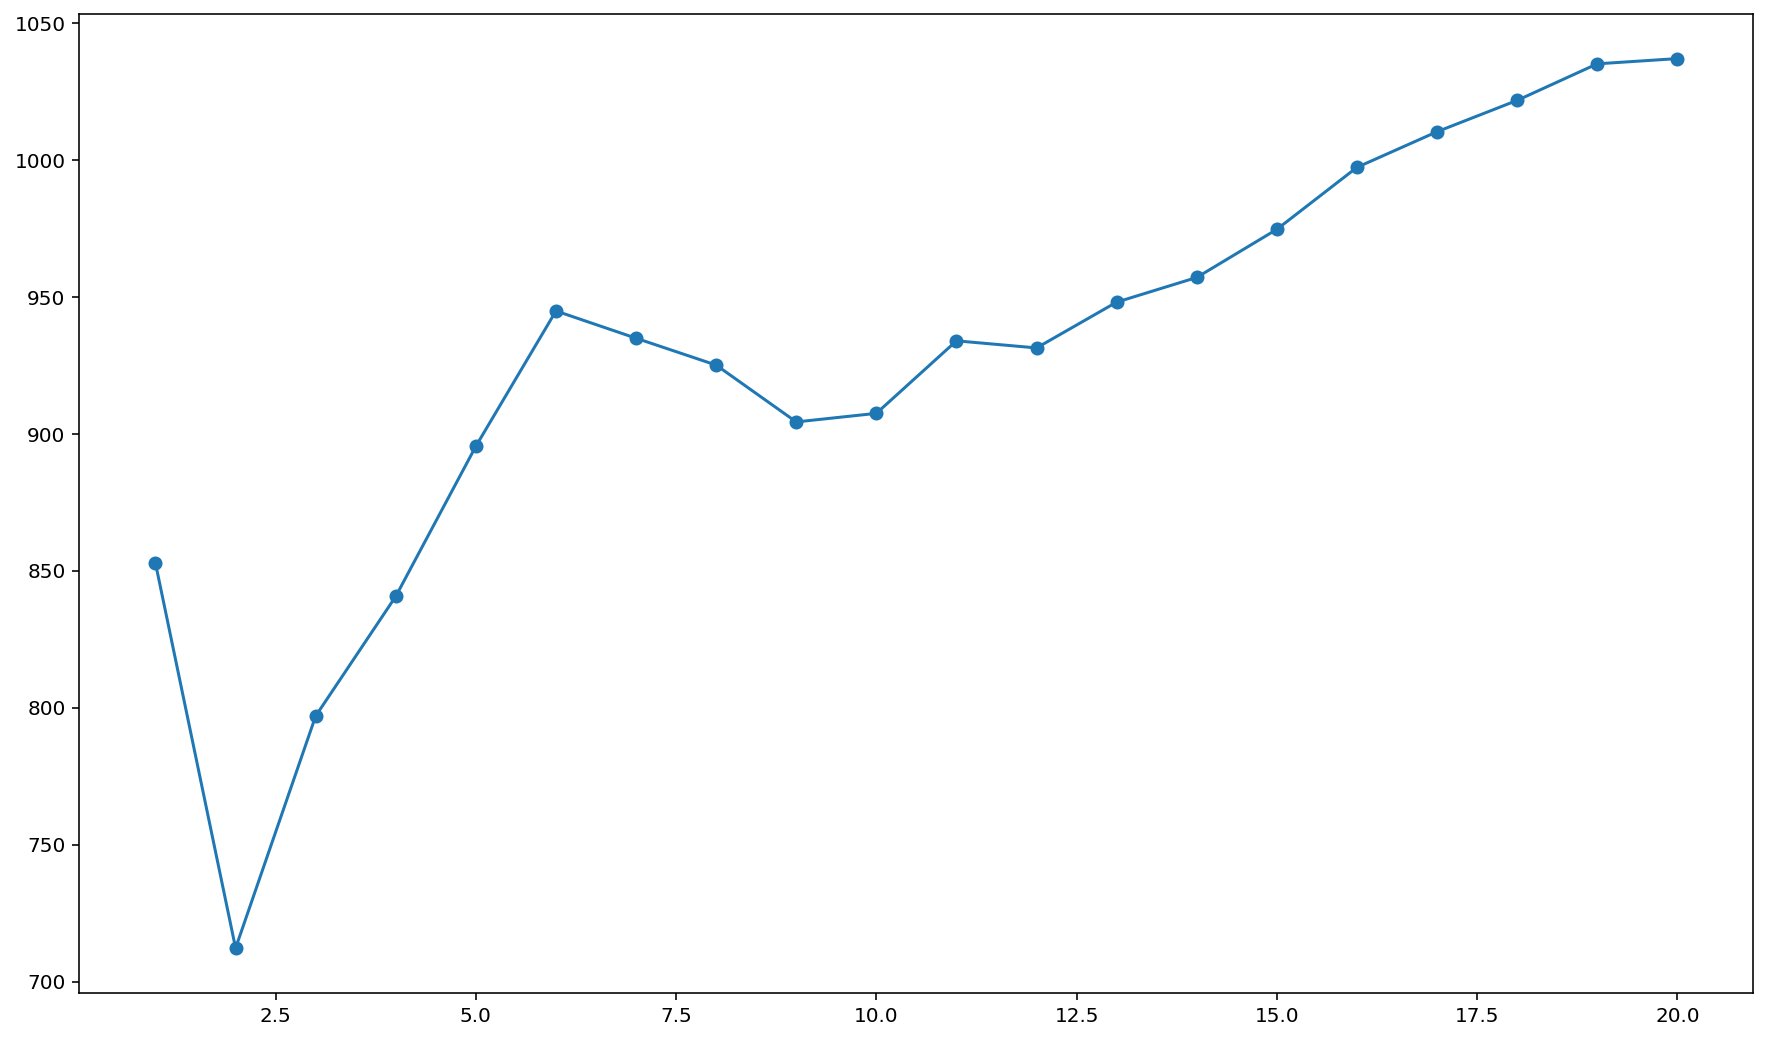

In [162]:
plt.plot(k,rmse_val,marker="o")

In [163]:
# Index of the smallest RMSE
mobb = rmse_val.index(np.min(rmse_val))
k_n = k[mobb]
k_n

2

In [165]:
mape = []
rmse = []
y = df3["count"].values
X = df3.iloc[:,0:7].values
for train_index, test_index in tqdm(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    models = neighbors.KNeighborsRegressor(n_neighbors = k_n).fit(X_train,y_train)
    testp = models.predict(X_test)
    mape.append(MAPE(y_test,testp))
    rmse.append(math.sqrt(mean_squared_error(y_test,testp)))

5it [00:00, 500.19it/s]


In [166]:
np.mean(mape),np.mean(rmse)

(58.02749549317646, 1646.2527869640355)

#### The Final KNN Model

In [167]:
print("1. RMSE of "+str(np.mean(rmse))+" and \n3. MAPE of "+str(np.mean(mape)))

1. RMSE of 1646.2527869640355 and 
3. MAPE of 58.02749549317646


#### Regression
1. explains around 95% variance 
2. RMSE of 941.3712932156241 and 
3. MAPE of 55.67640944299673

#### Dtree
1. RMSE of 1156.2214044064408 and 
3. MAPE of 63.273779470675755
Which is quite higher than that of the linear regression model.

#### Rforest
1. RMSE of 920.4720738932531 and 
3. MAPE of 51.274514533828665

#### KNN
1. RMSE of 1646.2527869640355 and 
3. MAPE of 58.02749549317646


## Conclusion
We Derived That on applying The following algorithm we came to know that are Random forest model out performs all the other models in terms of:
1. Explaining the variance,
2. along with the minimum mean squared error and 
3. minimum mean absolute percentage error.
#### Hence we can use it to predict The daily bike rental count very effectively.